In [ ]:
import numpy
import pandas as pd
import pandas_datareader as pdr
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import math
from sklearn.metrics import mean_squared_error
import yfinance as yf

In [ ]:
company="AAPL"
df=yf.Ticker(company)
df=df.history(period="10y")
df=df.reset_index()
df=df.drop(['Date', 'Dividends', 'Stock Splits'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,22.821436,22.874712,22.517329,22.559504,245266000
1,22.153280,22.477366,21.951280,22.388575,267632400
2,22.479593,22.597242,22.328648,22.548407,243706000
3,22.626093,22.719323,22.543961,22.595016,149197600
4,22.706006,22.719324,22.308667,22.410776,283609600


In [ ]:
df.tail()

,Open,High,Low,Close,Volume
2512,220.820007,221.270004,216.710007,220.910004,67180000
2513,218.919998,221.479996,216.729996,220.110001,51591000
2514,221.460007,223.089996,217.889999,222.660004,44587100
2515,222.500000,223.550003,219.820007,222.770004,37498200
2516,223.580002,224.039993,221.910004,222.500000,36722900


In [ ]:
df1=df.reset_index()['Close']
df1

,Close
0,22.559504
1,22.388575
2,22.548407
3,22.595016
4,22.410776
...,...
2512,220.910004
2513,220.110001
2514,222.660004
2515,222.770004


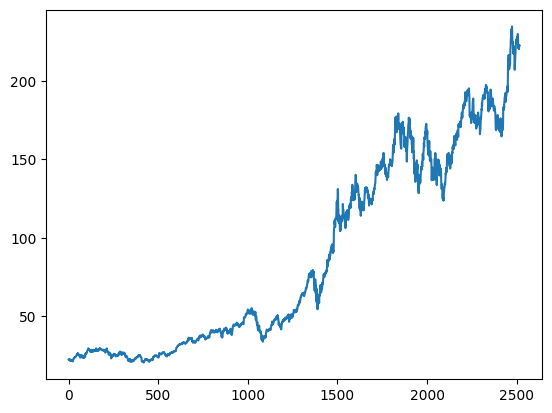

In [ ]:
plt.plot(df1)

In [ ]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(numpy.array(df1).reshape(-1,1))

In [ ]:
print(df1)

[[0.00860254]
 [0.00780317]
 [0.00855064]
 ...
 [0.94440161]
 [0.94491605]
 [0.94365333]]


In [ ]:
training_size=int(len(df1)*0.7)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [ ]:
training_size,test_size

(1761, 756)

In [ ]:
train_data

array([[0.00860254],
       [0.00780317],
       [0.00855064],
       ...,
       [0.61654712],
       [0.61176365],
       [0.5883055 ]])

In [ ]:
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
print(X_train.shape), print(y_train.shape)

(1660, 100)
(1660,)


(None, None)

In [ ]:
print(X_test.shape), print(ytest.shape)

(655, 100)
(655,)


(None, None)

In [ ]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
model=Sequential()
model.add(LSTM(50, return_sequences=True,input_shape=(100,1)))
model.add(Dropout(0.3))
model.add(LSTM(70, return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(90))
model.add(Dropout(0.5))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 70)             │          33,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 70)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 90)                  │          57,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 90)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              91 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 102,331 (399.73 KB)

 Trainable params: 102,331 (399.73 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=5,batch_size=64,verbose=1)

Epoch 1/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 13s 304ms/step - loss: 0.0183 - val_loss: 0.0043
Epoch 2/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 9s 254ms/step - loss: 0.0019 - val_loss: 0.0029
Epoch 3/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 10s 252ms/step - loss: 0.0011 - val_loss: 0.0027
Epoch 4/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 12s 304ms/step - loss: 0.0014 - val_loss: 0.0015
Epoch 5/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 10s 317ms/step - loss: 0.0011 - val_loss: 0.0033


In [ ]:
import tensorflow as tf
tf.__version__

'2.17.0'

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step


In [ ]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
import math
math.sqrt(mean_squared_error(y_train,train_predict))

63.7753255238233

In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

162.55370479910718

In [ ]:
from sklearn.metrics import r2_score
y_pred = model.predict(X_train)

# Invert scaling to get actual prices
y_train_actual = scaler.inverse_transform(y_train.reshape(-1, 1))
y_pred_actual = scaler.inverse_transform(y_pred)

# Calculate R^2 score
r2 = r2_score(y_train_actual, y_pred_actual)

print("R^2 Score:", r2)
print("Accuracy Percentage:", r2 * 100)

# Predicting the stock prices
y_pred = model.predict(X_test)

# Invert scaling to get actual prices
y_test_actual = scaler.inverse_transform(ytest.reshape(-1, 1))
y_pred_actual = scaler.inverse_transform(y_pred)

# Calculate R^2 score
r2 = r2_score(y_test_actual, y_pred_actual)

print("R^2 Score:", r2)
print("Accuracy Percentage:", r2 * 100)

52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step
R^2 Score: 0.9897231311649917
Accuracy Percentage: 98.97231311649917
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step
R^2 Score: 0.7402107040368837
Accuracy Percentage: 74.02107040368837


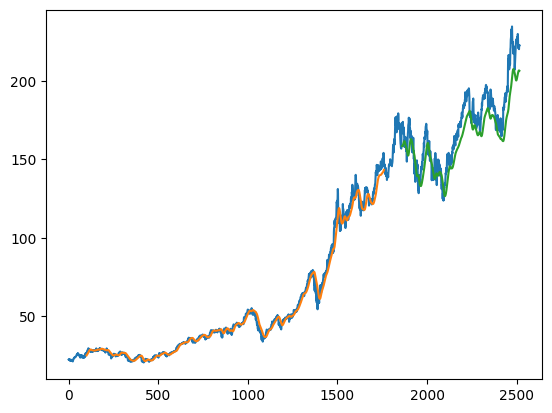

In [ ]:
### Plotting
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
a=len(test_data)
a

756

In [ ]:
x_input=test_data[a-100:].reshape(1,-1)
x_input.shape

(1, 100)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
temp_input

[0.6816733478901675,
 0.6915630512834487,
 0.695621505425452,
 0.6928692237135163,
 0.7124618101645284,
 0.6976741028783837,
 0.6928692237135163,
 0.7102692758597959,
 0.7585511290882672,
 0.7507608352717223,
 0.753979454223086,
 0.7555656430766449,
 0.7641024332759987,
 0.7581699242630147,
 0.7732580569168706,
 0.7786299622033133,
 0.7893271033722837,
 0.7898876357388802,
 0.7900277866705154,
 0.7954931021247336,
 0.8016125028332128,
 0.7948391595903619,
 0.7760607901097971,
 0.7905415782732517,
 0.7905883903970565,
 0.7919896856335751,
 0.7966609076217863,
 0.8011453092744469,
 0.8094600986854519,
 0.8109549468096351,
 0.8180551899597273,
 0.8115621485801467,
 0.8228198934756585,
 0.8052092581322017,
 0.8707467309786276,
 0.8984005649566833,
 0.9038658804109014,
 0.8956912419315317,
 0.9152169641142436,
 0.9040993701503672,
 0.8825650082407357,
 0.8723350606305311,
 0.8753712835629237,
 0.8797156056438937,
 0.8992413278266054,
 0.9032119378765298,
 0.8869559283656763,
 0.915590676145

In [ ]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=numpy.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)

[0.86625737]
101
1 day input [0.69156305 0.69562151 0.69286922 0.71246181 0.6976741  0.69286922
 0.71026928 0.75855113 0.75076084 0.75397945 0.75556564 0.76410243
 0.75816992 0.77325806 0.77862996 0.7893271  0.78988764 0.79002779
 0.7954931  0.8016125  0.79483916 0.77606079 0.79054158 0.79058839
 0.79198969 0.79666091 0.80114531 0.8094601  0.81095495 0.81805519
 0.81156215 0.82281989 0.80520926 0.87074673 0.89840056 0.90386588
 0.89569124 0.91521696 0.90409937 0.88256501 0.87233506 0.87537128
 0.87971561 0.89924133 0.90321194 0.88695593 0.91559068 0.93203343
 0.93801261 0.96038781 0.9673013  0.97131851 0.99140484 0.9661335
 0.98000701 0.99803803 1.         0.97225283 0.95029794 0.95090521
 0.94927036 0.95417507 0.92395213 0.91904742 0.92124288 0.92255084
 0.92516675 0.94048837 0.92311137 0.93011821 0.88064985 0.87112044
 0.88321902 0.89952163 0.9132084  0.9204104  0.93790108 0.94000555
 0.95403549 0.96025544 0.95950716 0.96240665 0.96189222 0.95314692
 0.96394995 0.96554    0.96951517 

In [ ]:
day_new=numpy.arange(1,101)
day_pred=numpy.arange(101,131)

In [ ]:
b=len(df1)
b

2517

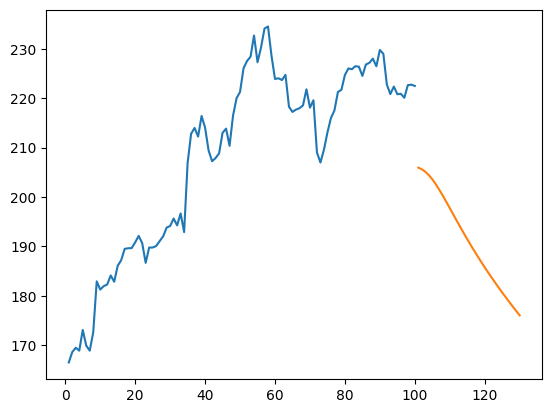

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df1[b-100:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

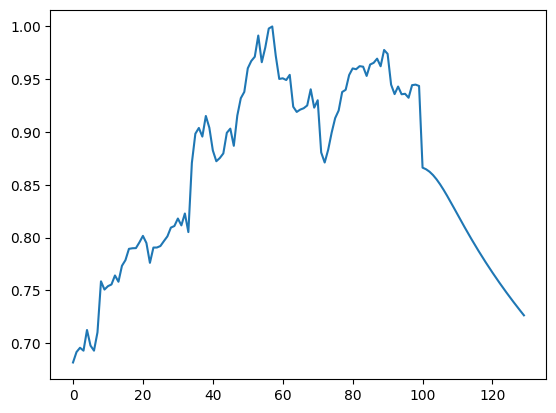

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[b-100:])

In [ ]:
df3=scaler.inverse_transform(df3).tolist()

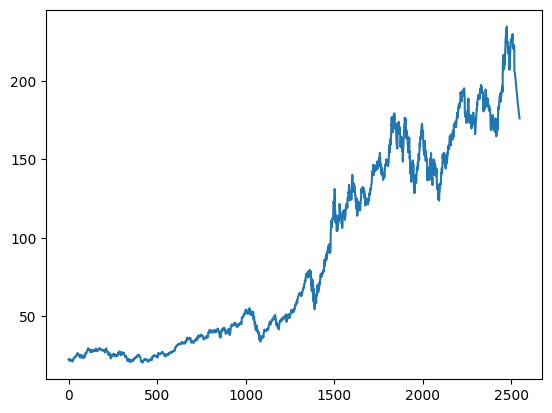

In [ ]:
plt.plot(df3)

In [ ]:
model.save('model.keras')

In [ ]:
import joblib

# Assume 'model' is your trained model
joblib.dump(model, 'model.pkl')

['model.pkl']